In [1]:
import torch

In [19]:
zeros = torch.zeros(1, 3, 4, 4)
print(zeros)

tensor([[[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]])


In [21]:
zeros[0, 1, :, :] = 1

In [22]:
zeros[0, 2, :, :] = 2

In [23]:
zeros

tensor([[[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[2., 2., 2., 2.],
          [2., 2., 2., 2.],
          [2., 2., 2., 2.],
          [2., 2., 2., 2.]]]])

In [24]:
f = torch.nn.Conv2d(in_channels=3, out_channels=3, 
                       kernel_size=(3,3), stride=1, 
                       padding=0, dilation=1, 
                       groups=3, bias=False)

In [25]:
f(zeros)

tensor([[[[ 0.0000,  0.0000],
          [ 0.0000,  0.0000]],

         [[-0.3569, -0.3569],
          [-0.3569, -0.3569]],

         [[-1.2526, -1.2526],
          [-1.2526, -1.2526]]]], grad_fn=<ConvolutionBackward0>)

In [30]:
f.weight

Parameter containing:
tensor([[[[-0.2774, -0.0023,  0.0841],
          [ 0.2852, -0.3191, -0.0934],
          [ 0.2588,  0.0794,  0.2394]]],


        [[[-0.2722, -0.3194,  0.0916],
          [ 0.3053, -0.2060, -0.0547],
          [-0.1917, -0.0357,  0.3259]]],


        [[[-0.1207,  0.1856,  0.0056],
          [-0.2711, -0.2974, -0.1465],
          [ 0.0688,  0.1319, -0.1825]]]], requires_grad=True)

In [34]:
torch.sum(f.weight[1])

tensor(-0.3569, grad_fn=<SumBackward0>)

In [36]:
torch.sum(f.weight[2])*2

tensor(-1.2526, grad_fn=<MulBackward0>)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
x = torch.arange(-10, 10, 1)
f = torch.nn.ReLU6()

In [79]:
y = f(x)

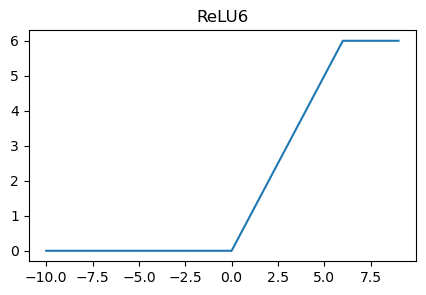

In [80]:
plt.figure(figsize=(5,3))
plt.title("ReLU6")
plt.plot(x, y)
plt.show()

In [4]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def swish(x):
    return x * sigmoid(x)

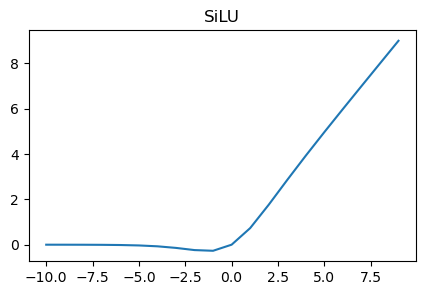

In [7]:
x = np.arange(-10, 10, 1)
y = swish(x)
plt.figure(figsize=(5,3))
plt.title("SiLU")
plt.plot(x, y)
plt.show()

In [44]:
import torch

input = torch.ones((2, 3, 4, 4))
p = 0.3
survival_rate = 1.0 - p
size = [input.shape[0]] + [1] * (input.ndim - 1)
print(size)

noise = torch.empty(size)
noise = noise.bernoulli_(survival_rate)
print(noise)
if survival_rate > 0.0:
    noise.div_(survival_rate)

[2, 1, 1, 1]
tensor([[[[0.]]],


        [[[1.]]]])


In [45]:
noise

tensor([[[[0.0000]]],


        [[[1.4286]]]])

In [8]:
input.shape

torch.Size([2, 3, 4, 4])

In [9]:
input*noise

tensor([[[[1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526]],

         [[1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526]],

         [[1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526],
          [1.0526, 1.0526, 1.0526, 1.0526]]],


        [[[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0

In [57]:
L = 5
pL = 0.6
for l in range(L):
    pl = 1 - (l/(L-1))*(1-pL)
    print(l, pl)

0 1.0
1 0.9
2 0.8
3 0.7
4 0.6
